
# <span style="color:rgb(213,80,0)">This function generates Figure 12 and Figure 6 of the Supplementary Information</span>

The plot can be generated in a simple way by reading the results previously generated with function paper\_Figure\_12\_simstudy\_Algo3.m, which are available in the ./aux folder. The filename of the results for Figure 12 is hereafter: change it according to your needs. The figure 6 of the SUpplementary Information is obtained by switching  shift = 10 to shift = 5.


The user can generate new results using function paper\_Figure\_12\_simstudy\_Algo3.m.

## Data settings

In [1]:
% set the name of the results file, generated by function paper_Figure_12_simstudy_Algo3.m

shift      = 10;
epsilonhat = ['Algo3_epsilon_hat_s' num2str(shift)]; %  Was 'DetailedResults_out_B_epsilon'
nuhat      = ['Algo3_nu_hat_s' num2str(shift)];      %  Was 'DetailedResults_out_B_nu'

% folder for input data and figures
out_path = './aux/';

% where to save the plots: no save if empty
savein = [];
if ~isempty(savein) && ~exist(savein,'dir')
    mkdir(savein);
end

## Graphical settings

In [2]:
% the plots are produced for a data space with p = 5 variables
my_p = 5;

% graphics settings
c1  = [0, 1, 1]; % violet
c2  = [0.4660 0.6740 0.1880]; % green2
c3  = [0.4940 0.1840 0.5560]; %'c';
c4  = [1, 0.7, 0.4];
c5  = [0.8, 0.8, 0.8];
c6  = [1, 0, 0]; %'r'
c7  = [0, 0, 1]; %'b'
c8  = [0, 1, 0]; %'g'
c9  = [1, 1, 0]; %'y';
mycolors = [c1 ; c2 ; c3 ; c4 ; c5 ; c6 ; c7];

stdfont = 20;

## Boxplots of $\hat{\epsilon}$

In [3]:
% Read the CSV file
data = readtable([out_path filesep epsilonhat '.xlsx']);

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


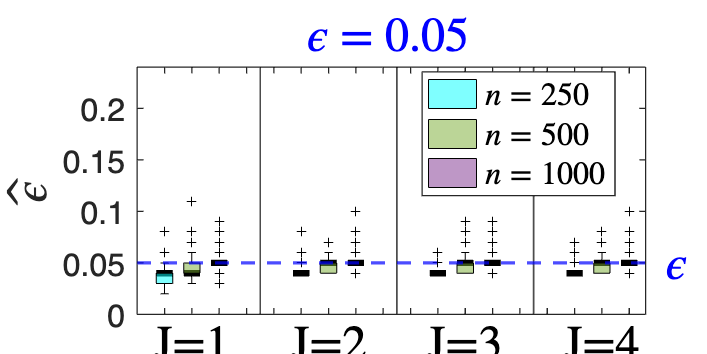


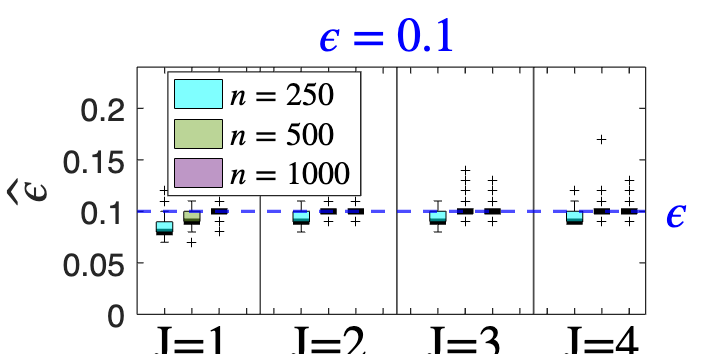

In [4]:
data = data(data.n>200,:); %remove small n
dataT = rows2vars(data);

% Get unique values
n_values     = unique(data.n);
J_values     = unique(data.J);
epsilon_true = unique(data.epsilon_true);
nJ = length(J_values);
nn = length(n_values);
ne = length(epsilon_true);

% Get the column names for replications
rep_cols = contains(data.Properties.VariableNames, 'rep');
rep_data = data(:, rep_cols);

% For each epsilon value
for ieps = 1:ne
    % Create subplot for each epsilon value
    % subplot(length(epsilon_true), 1, eps)

    % Create figure
    hfig=figure('Position', [100, 100, 1200, 600]);
    set(gca,'FontSize',stdfont);

    hold on
    pos = 1;  % Position counter for boxplots
    Jpos   = zeros(nJ,1);
    for iJ = 1:nJ      % For each J value

        for in = 1:nn  % For each n value

            % Get data for current combination
            mask =  data.v == my_p & ...
                data.J == J_values(iJ) & ...
                data.n == n_values(in) & ...
                data.epsilon_true == epsilon_true(ieps);

            current_data   = table2array(rep_data(mask, :));

            % Create boxplot
            hbox = boxplot(current_data, 'Positions', pos, 'Width', 0.6, ...
                'Colors', 'k', 'Symbol', 'k+');
            medians = findobj(hbox, 'type', 'line', 'tag', 'Median');
            set(medians, 'LineWidth', 4);

            % Color the box based on n value
            h = findobj(gca, 'Tag', 'Box');
            if ~isempty(h)
                patch(get(h(1), 'XData'), get(h(1), 'YData'), mycolors(in,:), 'FaceAlpha', 0.5);
            end
            pos = pos + 1;
        end
        % Add space between J groups
        xline(pos+0.5, '-k', 'LineWidth', 1, 'Color','k');
        Jpos(iJ) = pos-nn;
        pos = pos + 2;
    end

    % Add true epsilon line
    yline(epsilon_true(ieps), '--k', 'LineWidth', 2, 'Color','b');
    text(max(xlim)*1.03 , epsilon_true(ieps), ' !!!EQ_2!!! ','Interpreter','latex','FontSize',stdfont+10,'Color','b');

    % Customize plot
    title([' !!!EQ_2!!!  = ' num2str(epsilon_true(ieps))],'Interpreter','latex','FontSize',stdfont+10,'Color','b');
    ylabel(' !!!EQ_1!!! ','Interpreter','latex','FontSize',stdfont+10);

    % Set x-axis labels
    xticks((1:pos-3));
    xticklabels([]);

    % Set y-axis limits
    ylim([0 max(epsilon_true)*1.2]);

    % Add J value labels
    j_positions = Jpos + (length(n_values)-1)/2  ;
    text(j_positions, repmat(min(ylim), 1, length(J_values)), ...
        arrayfun(@(x) ['J=' num2str(x)], J_values, 'UniformOutput', false), ...
        'HorizontalAlignment', 'center', 'VerticalAlignment', 'top',...
        'Interpreter','latex','FontSize',stdfont+10);

    % Adjust subplot spacing
    set(gcf, 'Color', 'w');
    box on;
    ax = gca;
    ax.LineWidth = 0.8;

    % Add legend to the first subplot only
    % {' !!!EQ_5!!! ', ' !!!EQ_6!!! ', ' !!!EQ_7!!! ', ' !!!EQ_8!!! '}
    theleg = arrayfun(@(n) sprintf(' !!!EQ_9!!! ', n), n_values, 'UniformOutput', false);
    legend(theleg, 'Location', 'northeast','Interpreter','latex','FontSize',stdfont,'Location','best');

    if ~isempty(savein)
        saveas(hfig,[savein filesep 'epsilon' num2str(epsilon_true(ieps)*100) '.fig'],'fig');
        saveas(hfig,[savein filesep 'epsilon' num2str(epsilon_true(ieps)*100) '.png'],'png');
        saveas(hfig,[savein filesep 'epsilon' num2str(epsilon_true(ieps)*100) '.eps'],'epsc');
    end
end

<center>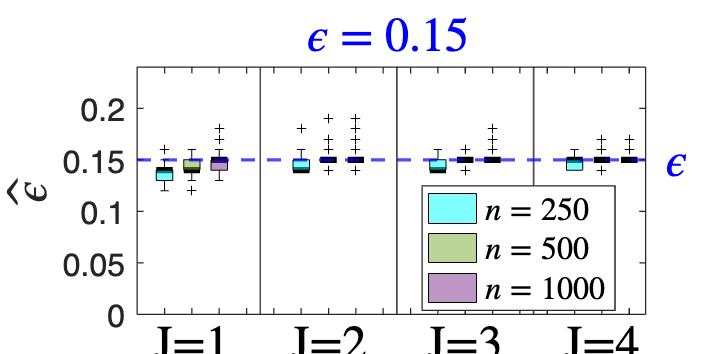</center>


<center>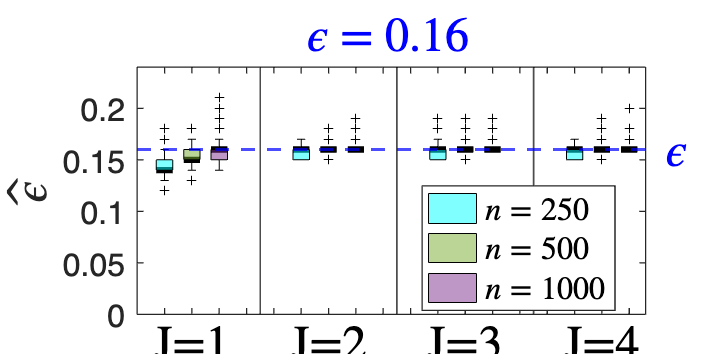</center>


<center>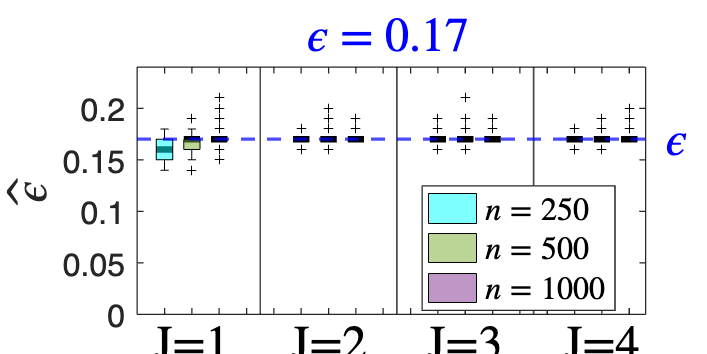</center>


<center>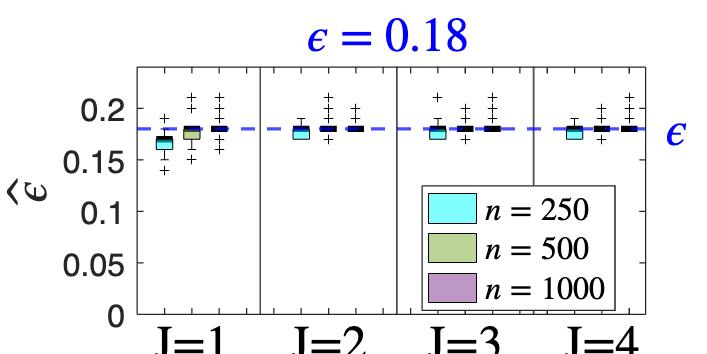</center>


<center>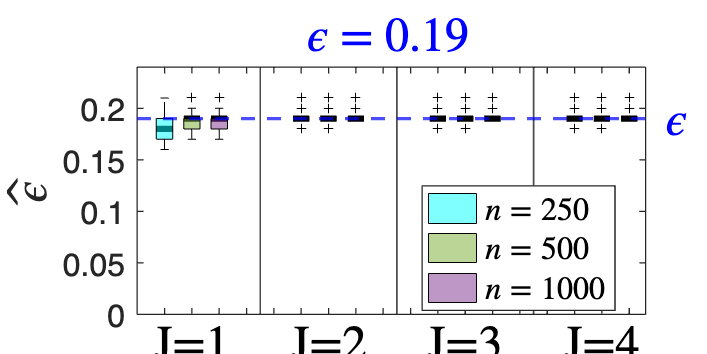</center>


<center>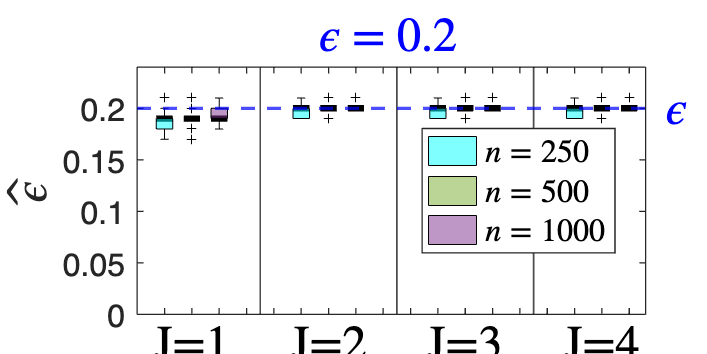</center>

## Bubble plot of $\hat{\nu}$

In [5]:
% Read the CSV file
data = readtable([out_path filesep nuhat '.xlsx']);

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


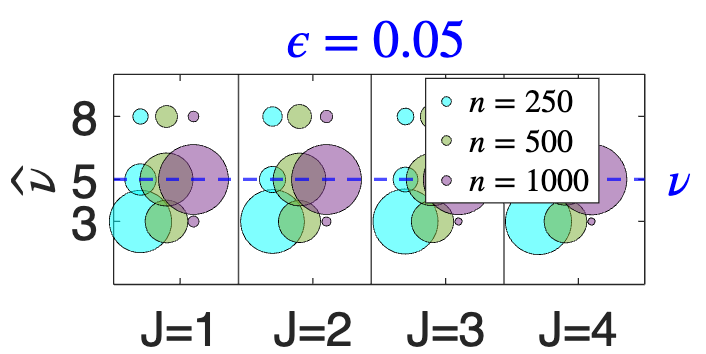


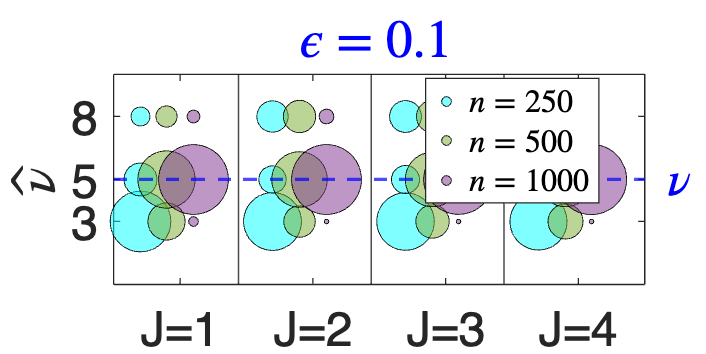

In [6]:
data = data(data.n>200,:); %remove small n

% Get unique values
J_values = unique(data.J);
n_values = unique(data.n);
nu_true = unique(data.nu_true);
epsilon_true = unique(data.epsilon_true);
nJ = length(J_values);
nn = length(n_values);
ne = length(epsilon_true);

% Get the column names for replications
rep_cols = contains(data.Properties.VariableNames, 'rep');
rep_data = data(:, rep_cols);

% For each epsilon value
for ieps = 1:ne
    % Create figure
    hfig = figure('Position', [100, 100, 1200, 600]);
    set(gca,'FontSize',stdfont);
    hold on;

    % For plotting positions
    x_offset = 0.2;  % Space between different n values

    for iJ = 1:nJ

        % this is for the nu values to put on the y axis
        my_yticks = [];

        for in = 1:nn
            % Get data for current combination
            mask = data.v == my_p & ...
                data.J == J_values(iJ) & ...
                data.n == n_values(in) & ...
                data.epsilon_true == epsilon_true(ieps);

            current_data = table2array(rep_data(mask, :));

            % Skip the rest if no data are found
            if ~(isempty(current_data) || all(isnan(current_data)))

                % Calculate frequency of each unique value
                %unique_vals = unique(current_data(~isnan(current_data)));  % Exclude NaN values
                t_freq = tabulate(current_data);
                if ~isempty(t_freq)
                    t_freq = t_freq(t_freq(:,2)>0, :);
                    unique_vals = t_freq(:,1);  % unique values
                    numel_vals  = t_freq(:,2);  % their occurrencies
                    freq_vals   = t_freq(:,3);  % their frequencies
                    my_yticks   = union(my_yticks , unique_vals);

                    % the radius of the circles should be proportional to
                    % the square root of the frequencies
                    area_circle = freq_vals*20;

                else
                    error('This should not happen');
                end

                % Plot vertical bubbles at x_pos
                x_pos = J_values(iJ) + (in-2.5)*x_offset;  % Adjust x position for each n value
                theDisplayName = sprintf(' !!!EQ_9!!! ', n_values(in));

                % Create scatter and store the handle for the first occurrence only
                if iJ == 1
                    h(in) = scatter(x_pos, unique_vals(1), area_circle(1), mycolors(in,:), ...
                        'filled', 'MarkerFaceAlpha', 0.5, 'MarkerEdgeColor', 'k', ...
                        'DisplayName', theDisplayName);
                end
                % Plot remaining points without DisplayName to avoid legend duplication
                for ival = 1:numel(unique_vals)
                    if ~(iJ == 1 && ival == 1)  % Skip the first point which was already plotted
                        scatter(x_pos, unique_vals(ival), area_circle(ival), mycolors(in,:), ...
                            'filled', 'MarkerFaceAlpha', 0.5, 'MarkerEdgeColor', 'k');
                    end
                end
            else
                disp(['All nan for J=' num2str(J_values(iJ)) ' - n=' num2str(n_values(in)) ' - epsilon_true=' num2str(epsilon_true(ieps))]);
            end
        end
        if iJ < nJ
            x_pos_line = x_pos + 1.7*x_offset;
            xline(x_pos_line, '-k', 'LineWidth', 1, 'Color','k');
        end
    end

    % Add true nu line
    yline(nu_true, '--k', 'LineWidth', 2, 'Color', 'b');
    text(max(xlim)*1.03, nu_true, ' !!!EQ_12!!! ', 'Interpreter', 'latex', 'FontSize', stdfont+10, 'Color', 'b');

    % Customize plot
    title([' !!!EQ_2!!!  = ' num2str(epsilon_true(ieps))], 'Interpreter', 'latex', 'FontSize', stdfont+10, 'Color', 'b');
    ylabel(' !!!EQ_10!!! ', 'Interpreter', 'latex', 'FontSize', stdfont+10);
    %xlabel(' !!!EQ_15!!! ', 'Interpreter', 'latex', 'FontSize', stdfont+10);

    % Set axis properties
    xticks(J_values);
    xticklabels(arrayfun(@(x) ['J=' num2str(x)], J_values, 'UniformOutput', false));
    set(gca, 'FontSize', stdfont+10);

    % Set axis properties
    yticks(my_yticks);

    xlim([min(J_values)-0.5 max(J_values)+0.5]);
    ylim([0 10]);  % Adjust based on your data range

    % Add legend
    legend(h(1:nn), 'Location', 'best', 'Interpreter', 'latex', 'FontSize', stdfont,'Location','best');

    % Set figure properties
    set(gcf, 'Color', 'w');
    grid off;
    box on;
    ax = gca;
    ax.LineWidth = 0.8;

    if ~isempty(savein)
        saveas(hfig,[savein filesep 'nu' num2str(epsilon_true(ieps)*100) '.fig'],'fig');
        saveas(hfig,[savein filesep 'nu' num2str(epsilon_true(ieps)*100) '.png'],'png');
        saveas(hfig,[savein filesep 'nu' num2str(epsilon_true(ieps)*100) '.eps'],'epsc');
    end

end

<center>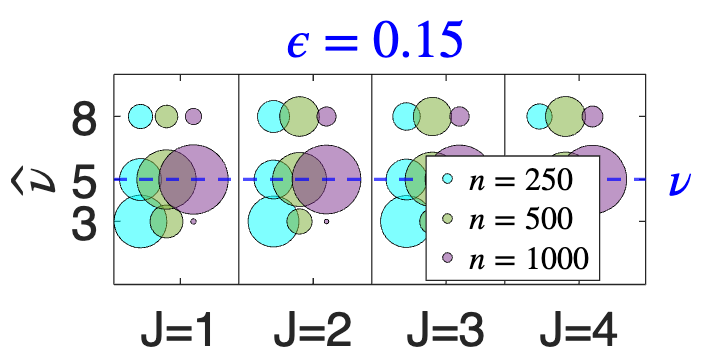</center>


<center>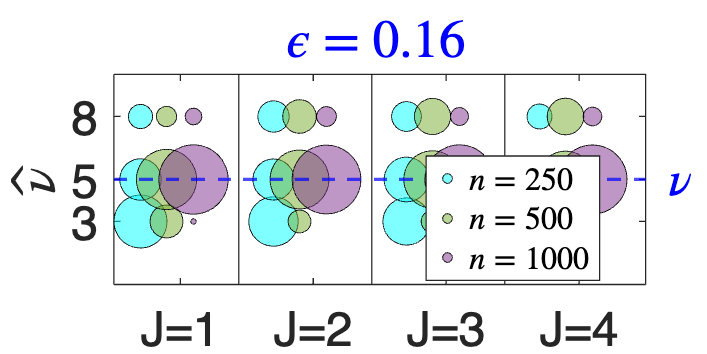</center>


<center>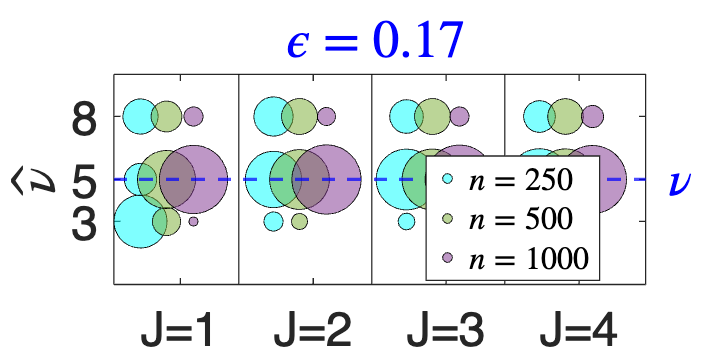</center>


<center>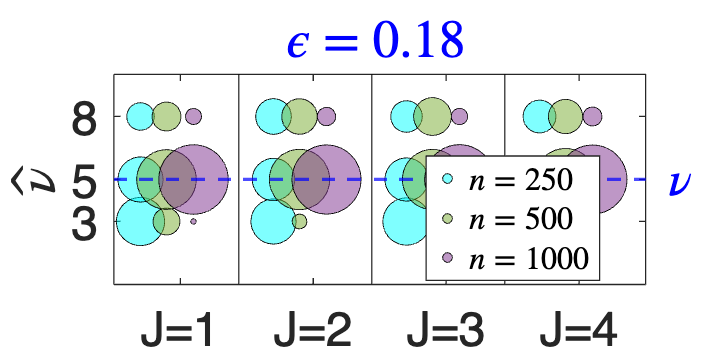</center>


<center>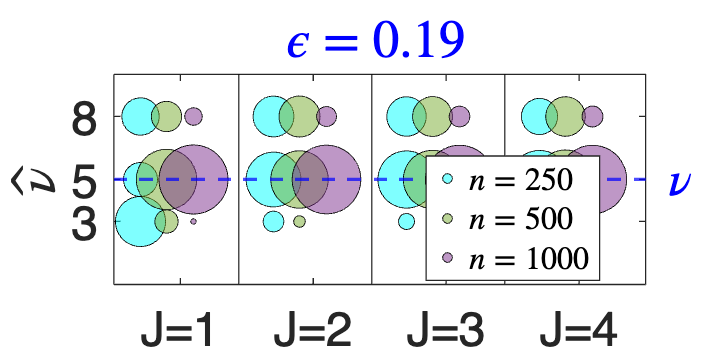</center>


<center>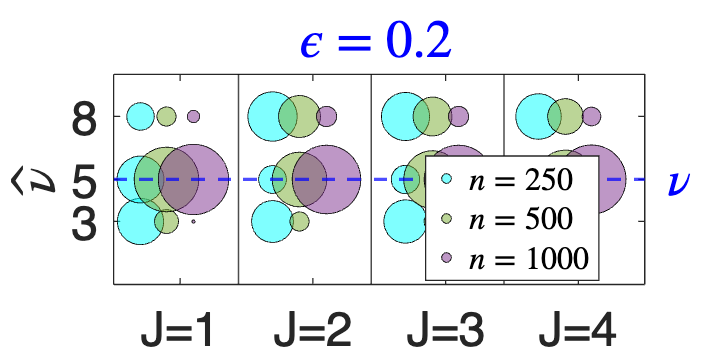</center>

